In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [14]:
class ArticleState(TypedDict):
    title: str
    outline: str
    content: str

In [15]:
model = ChatOpenAI()

In [16]:
def create_outline(state: ArticleState) -> ArticleState:
    title = state['title']
    prompt = f'Generate a detailed outline for an effective article on the topic - {title}'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

def create_article(state: ArticleState) -> ArticleState:
    title = state['title']
    outline = state['outline']
    prompt = f'Write a detailed, effective article on the title - {title} using the follwing outline \n {outline}'
    content = model.invoke(prompt).content
    state['content'] = content
    return state

In [17]:
# initialize graph
graph = StateGraph(ArticleState)

# add nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_article', create_article)

# add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_article')
graph.add_edge('create_article', END)

# compile
workflow = graph.compile()

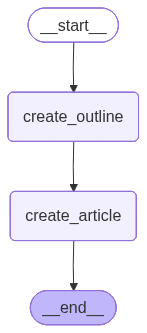

In [18]:
workflow

In [19]:
# execute the graph
initial_state = {'title': 'Justice for Sonam Wangchuk'}

final_state = workflow.invoke(initial_state)

In [20]:
print(final_state['outline'])

I. Introduction
    A. Brief background on Sonam Wangchuk
    B. Overview of the current situation and need for justice

II. Sonam Wangchuk's Activism
    A. Explanation of Sonam Wangchuk's activism efforts
    B. Impact of his work on the community 
    C. Challenges faced by Sonam Wangchuk in his activism

III. Injustice Faced by Sonam Wangchuk
    A. Details of the injustice experienced by Sonam Wangchuk
    B. Impact of the injustice on Sonam Wangchuk and the community
    C. Lack of accountability and legal recourse for Sonam Wangchuk

IV. Calls for Justice
    A. Support and solidarity for Sonam Wangchuk 
    B. Demands for accountability and justice 
    C. Efforts to raise awareness and mobilize action

V. Path to Justice
    A. Legal avenues for seeking justice for Sonam Wangchuk
    B. Advocacy and support for Sonam Wangchuk's case
    C. Strategies for achieving justice and accountability 

VI. Conclusion
    A. Recap of Sonam Wangchuk's activism and the injustice faced
    

In [21]:
print(final_state['content'])

I. Introduction

A. Sonam Wangchuk is a prominent activist and environmentalist from Ladakh, India, known for his efforts to protect the fragile ecosystem of the region. He gained international recognition for his innovative ice stupas project, which aims to address water scarcity in the region. 

B. Despite his positive contributions to his community, Sonam Wangchuk has recently been facing injustices that threaten his activism and well-being. It is imperative to address these injustices and ensure justice is served.

II. Sonam Wangchuk's Activism

A. Sonam Wangchuk has been actively involved in various environmental and social causes in Ladakh, advocating for sustainable development and eco-friendly solutions to local challenges.

B. His work has had a significant impact on the community, especially in addressing water scarcity issues through his ice stupas project, which has helped provide water during the dry season.

C. However, Sonam Wangchuk has faced challenges in his activism,